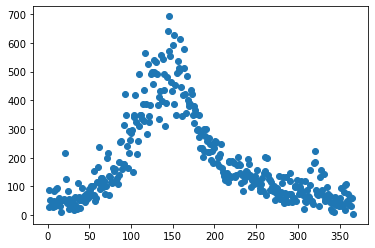

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

w=pd.read_csv("1950-2020_all_tornadoes.csv")




x=np.linspace(1,366,366)
torn=np.zeros([366,1])

year={}
year['1']=0
year['2']=31
year['3']=59
year['4']=90
year['5']=120
year['6']=151
year['7']=181
year['8']=212
year['9']=243
year['10']=273
year['11']=304
year['12']=334

for i in range(len(w['mo'])):
    day=int(w['dy'][i])
    month=str(w['mo'][i])
    mm=year[month]
    ww=day+mm
    if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
        ww=ww+1
    torn[ww-1]=torn[ww-1]+1
plt.plot(x,torn,'o')




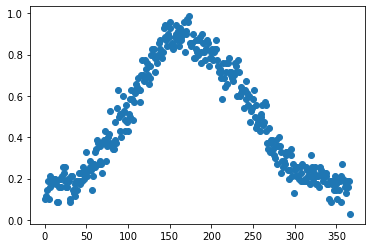

In [3]:
lista=[]
days=np.zeros([366,1]) #probability of tornado occuring at least once on a specific day

for i in range(len(w['mo'])):
    if w['date'][i] not in lista:
        lista.append(w['date'][i])
        day=int(w['dy'][i])
        month=str(w['mo'][i])
        mm=year[month]
        ww=day+mm
        if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
            ww=ww+1
        days[ww-1]=days[ww-1]+1
plt.plot(x,days/70,'o')

In [4]:
model1_ppc=CmdStanModel(stan_file='model1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [5]:
m1=model1_ppc.sample(iter_sampling=100000,chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                          


INFO:cmdstanpy:CmdStan done processing.


In [6]:
mu1=m1.stan_variable('mu')
sigma1=m1.stan_variable('sigma')
prob1=m1.stan_variable('prob')

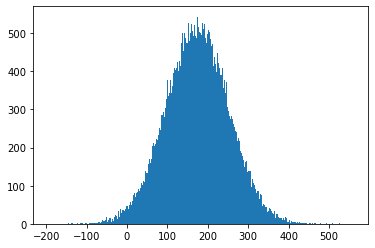

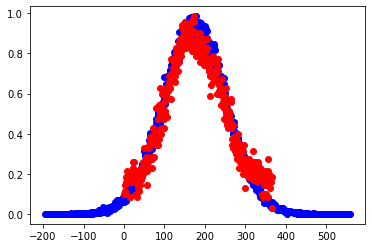

In [7]:
mini=1000
maxi=0
for i in prob1:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins=int(abs(maxi-mini))
u=plt.hist(prob1,bins=bins)

plt.figure()
plt.plot(u[1][:-1],u[0]/max(u[0])*69/70,'bo')
plt.plot(x,days/70,'ro')

In [8]:
model1_fit=CmdStanModel(stan_file='model1_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model1_fit.stan to exe file C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model1_fit.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model1_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Roman/Documents/Data_science/DA_prj/DA_Project/model1_fit.hpp C:/Users/Roman/Documents/Data_science/DA_prj/DA_Project/model1_fit.stan
Warning in 'C:/Users/Roman/Documents/Data_science/DA_prj/DA_Project/model1_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-varia

In [9]:
y=np.linspace(1,366,366)
data=dict(N=len(y),probs=y)
m2=model1_fit.sample(data=data,iter_sampling=5000,chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [10]:
mu2=m2.stan_variable('mu')
sigma2=m2.stan_variable('sigma')
prob2=m2.stan_variable('prob')



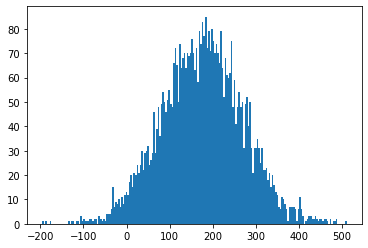

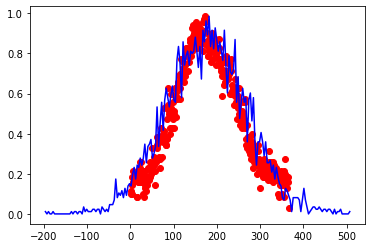

In [11]:
mini=1000
maxi=0
for i in prob2:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins2=int(abs(maxi-mini))
u2=plt.hist(prob2,bins=200)

plt.figure()
plt.plot(x,days/70,'ro')
plt.plot(u2[1][:-1],u2[0]/max(u2[0])*69/70,'b-')



In [12]:
model2_ppc=CmdStanModel(stan_file='model2_ppc.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model2_ppc.stan to exe file C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model2_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model2_ppc.exe


In [13]:
#data=dict(lam = 174)
m3=model2_ppc.sample(iter_sampling=5000,chains=1)
prob3=m3.stan_variable('prob')

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


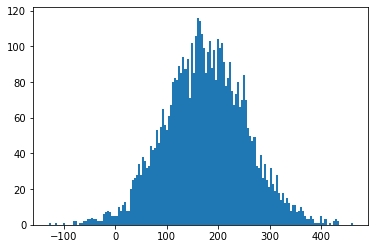

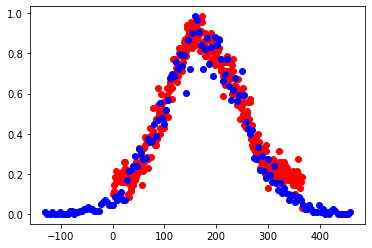

In [14]:
mini=1000
maxi=0
for i in prob3:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins3=int(abs(maxi-mini))
u3=plt.hist(prob3,bins=150)

plt.figure()
plt.plot(x,days/70,'ro')
plt.plot(u3[1][:-1],u3[0]/max(u3[0])*69/70,'bo')



In [17]:
model2_fit=CmdStanModel(stan_file='model2_fit.stan')

INFO:cmdstanpy:compiling stan file C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model2_fit.stan to exe file C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model2_fit.exe
ERROR:cmdstanpy:Stan program failed to compile:
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/Users/Roman/Documents/Data_science/DA_prj/DA_Project/model2_fit.hpp C:/Users/Roman/Documents/Data_science/DA_prj/DA_Project/model2_fit.stan
Warning in 'C:/Users/Roman/Documents/Data_science/DA_prj/DA_Project/model2_fit.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Semantic error in 'C:/Users/Roman/Documents/Data_science/DA_prj/DA_Project/model2_fit.stan', line 13, column 4 to column 19:
   -------------------------------------------------
    11:  
    12:  model{
  

ValueError: Unable to compile Stan model file: C:\Users\Roman\Documents\Data_science\DA_prj\DA_Project\model2_fit.stan.